In [1]:
%matplotlib inline
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
cwd = os.getcwd()
assert "miriam" in cwd
sys.path.append(cwd + "/..")
import scenarios.generators
import scenarios.evaluators
import visualization
import solvers

In [2]:
env, starts, goals = scenarios.generators.tracing_pathes_in_the_dark(16, .6, 4, 0)

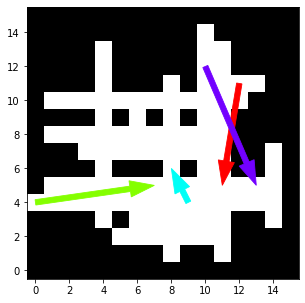

In [3]:
visualization.plot_with_arrows(env, starts, goals)
plt.show()

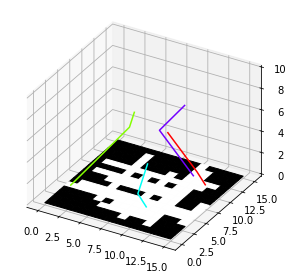

In [4]:
paths_indep = solvers.indep(env, starts, goals)
visualization.plot_with_paths(env, paths_indep)
plt.show()

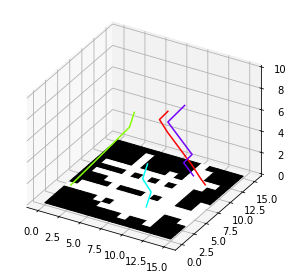

In [5]:
paths_ecbs = solvers.ecbs(env, starts, goals, return_paths=True)
visualization.plot_with_paths(env, paths_ecbs)
plt.show()

In [6]:
data_ecbs = solvers.ecbs(env, starts, goals)
print(data_ecbs)

{'statistics': {'cost': 30, 'makespan': 10, 'runtime': 0.040277, 'highLevelExpanded': 3, 'lowLevelExpanded': 343}, 'schedule': {'agent0': [{'x': 12, 'y': 11, 't': 0}, {'x': 12, 'y': 10, 't': 1}, {'x': 11, 'y': 10, 't': 2}, {'x': 11, 'y': 9, 't': 3}, {'x': 11, 'y': 8, 't': 4}, {'x': 11, 'y': 7, 't': 5}, {'x': 11, 'y': 6, 't': 6}, {'x': 11, 'y': 5, 't': 7}, {'x': 10, 'y': 5, 't': 8}, {'x': 11, 'y': 5, 't': 9}], 'agent1': [{'x': 0, 'y': 4, 't': 0}, {'x': 1, 'y': 4, 't': 1}, {'x': 2, 'y': 4, 't': 2}, {'x': 3, 'y': 4, 't': 3}, {'x': 4, 'y': 4, 't': 4}, {'x': 5, 'y': 4, 't': 5}, {'x': 6, 'y': 4, 't': 6}, {'x': 7, 'y': 4, 't': 7}, {'x': 7, 'y': 5, 't': 8}], 'agent2': [{'x': 9, 'y': 4, 't': 0}, {'x': 9, 'y': 5, 't': 1}, {'x': 8, 'y': 5, 't': 2}, {'x': 8, 'y': 6, 't': 3}], 'agent3': [{'x': 10, 'y': 12, 't': 0}, {'x': 10, 'y': 11, 't': 1}, {'x': 10, 'y': 10, 't': 2}, {'x': 11, 'y': 10, 't': 3}, {'x': 11, 'y': 9, 't': 4}, {'x': 11, 'y': 8, 't': 5}, {'x': 11, 'y': 7, 't': 6}, {'x': 11, 'y': 6, 't'

In [7]:
paths_icts = solvers.icts(env, starts, goals, return_paths=True)
visualization.plot_with_paths(env, paths_icts)
plt.show()

In [9]:
# a funny scenario ..
fenv, fstarts, fgoals = (np.array([[1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1]], dtype=int), np.array([[2, 2],
       [6, 1],
       [5, 0],
       [6, 4],
       [0, 5]]), np.array([[2, 1],
       [6, 0],
       [2, 0],
       [5, 6],
       [4, 1]]))

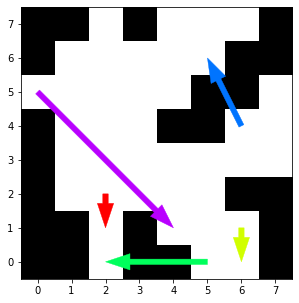

In [10]:
visualization.plot_with_arrows(fenv, fstarts, fgoals)
plt.show()

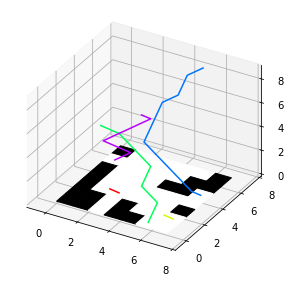

In [11]:
paths_indep = solvers.indep(fenv, fstarts, fgoals)
visualization.plot_with_paths(fenv, paths_indep)
plt.show()

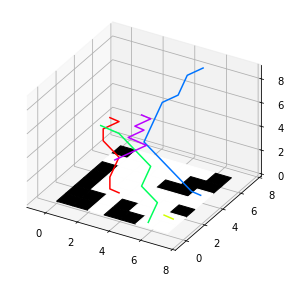

In [12]:
paths_ecbs = solvers.ecbs(fenv, fstarts, fgoals, return_paths=True)
visualization.plot_with_paths(fenv, paths_ecbs)
plt.show()

In [13]:
# another funny scenario. it gave different decen and ecbs costs with only on agent
denv, dstarts, dgoals = (np.array([[1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0],
       [1, 0, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]], dtype=int), np.array([[2, 0]]), np.array([[1, 6]]))

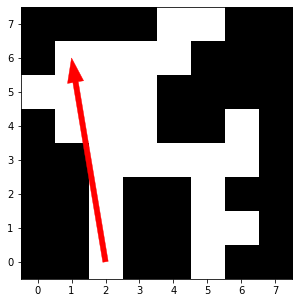

In [14]:
visualization.plot_with_arrows(denv, dstarts, dgoals)
plt.show()

[array([[2, 0, 0],
       [2, 1, 1],
       [2, 2, 2],
       [2, 3, 3],
       [2, 4, 4],
       [1, 4, 5],
       [1, 5, 6],
       [1, 6, 7]])]


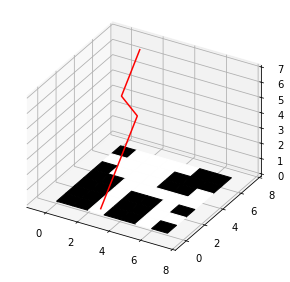

In [15]:
paths_indep = solvers.indep(denv, dstarts, dgoals)
print(paths_indep)
visualization.plot_with_paths(denv, paths_indep)
plt.show()

[array([[2, 0, 0],
       [2, 1, 1],
       [2, 2, 2],
       [2, 3, 3],
       [2, 4, 4],
       [2, 5, 5],
       [2, 6, 6],
       [1, 6, 7]])]


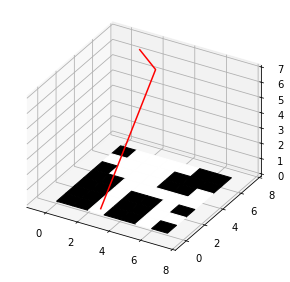

In [16]:
paths_ecbs = solvers.ecbs(denv, dstarts, dgoals, return_paths=True)
print(paths_ecbs)
visualization.plot_with_paths(denv, paths_ecbs)
plt.show()